> Code to accompany **Chapter 6: Methods for Generating Adversarial Perturbation**

# Fashion-MNIST Foolbox Boundary Attack

## Load in the model and its predictions


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.load_model('../models/fashion-MNIST.h5')

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
test_images = test_images/255.0
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

model = tf.keras.models.load_model('../models/fashion-MNIST.h5')
predictions = model.predict(test_images)

## Select the original (non-adversarial) image


Prediction for original image: 7 Sneaker


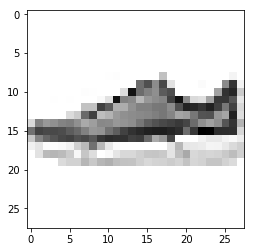

In [3]:
original_image_num = 9

x = test_images[original_image_num]
y = np.argmax(predictions[original_image_num])
y_name = class_names[y]

print("Prediction for original image:", y, y_name)

plt.imshow(x, cmap=plt.cm.binary)


Prediction for starting point image: 5 Sandal


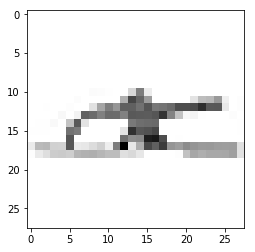

In [4]:
starting_point_image_num = 52

starting_point_image = test_images[starting_point_image_num]
y_adv = np.argmax(predictions[starting_point_image_num])
y_adv_name = class_names[y_adv]

print("Prediction for starting point image:", y_adv, y_adv_name) 
import matplotlib.pyplot as plt

plt.imshow(starting_point_image, cmap=plt.cm.binary)


## Get a Foolbox model from our Keras one¶
Create a Foolbox model from our Keras one. 

In [5]:
import foolbox
fmodel = foolbox.models.TensorFlowModel.from_keras(model, bounds=(0, 1))

## Define the attack specificity

[foolbox.criteria](https://foolbox.readthedocs.io/en/latest/modules/criteria.html) defines the attach specificity (targeted versus untargeted) and the probability threshold required. 
 

In [6]:
attack_criterion = foolbox.criteria.TargetClass(y_adv)

## Define the attack method

In [7]:
attack = foolbox.attacks.BoundaryAttack(fmodel, criterion=attack_criterion)


## Run the attack

In [10]:
x_adv = attack(input_or_adv = x, 
               label = y,
               starting_point = starting_point_image,
               unpack = False,
               log_every_n_steps = 500)

run with verbose=True to see details
Step 0: 5.60511e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 500: 1.25719e-02, stepsizes = 1.0e-02/1.3e-03: d. reduced by 0.26% (3.3177e-05) (took 0.00898 seconds)
Step 1000: 1.07155e-03, stepsizes = 3.4e-02/3.0e-03:  (took 0.01197 seconds)
Step 1500: 6.05335e-04, stepsizes = 1.0e-02/3.9e-04:  (took 0.01097 seconds)
Step 2000: 5.27720e-04, stepsizes = 4.4e-03/1.7e-04:  (took 0.01297 seconds)
Step 2500: 5.09628e-04, stepsizes = 5.9e-04/1.5e-05: d. reduced by 0.00% (1.5518e-08) (took 0.01396 seconds)
Step 3000: 5.04694e-04, stepsizes = 3.9e-04/1.0e-05: d. reduced by 0.00% (1.0245e-08) (took 0.01296 seconds)
Step 3500: 5.00969e-04, stepsizes = 2.6e-04/6.8e-06: d. reduced by 0.00% (6.7796e-09) (took 0.01396 seconds)
Step 4000: 4.99318e-04, stepsizes = 7.7e-05/2.0e-06: d. reduced by 0.00% (2.0021e-09) (took 0.01297 seconds)
Step 4500: 4.98847e-04, stepsizes = 2.3e-05/5.9e-07: d. reduced by 0.00% (5.9266e-10) (took 0.01396 seconds)
Step 4930: 4.98754e-04, step

If the attack was successful, the images should be different. Take a look to see whether this is the case.

normalized MSE = 4.99e-04


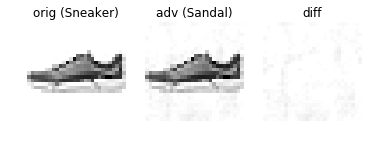

In [11]:
if ((x_adv is None) or (np.array_equal(x, x_adv.image))):
    print("No adversarial example was found")
else:   
    preds = model.predict(np.array([x_adv.image]))

    plt.figure()

    # Plot the original image
    plt.subplot(1, 3, 1)
    title = "orig (" + y_name + ")"
    plt.title(title)
    plt.imshow(x, cmap=plt.cm.binary)
    plt.axis('off')

    # Plot the adversarial image
    plt.subplot(1, 3, 2)
    title = "adv (" + class_names[np.argmax(preds[0])] + ")"
    plt.title(title)
    plt.imshow(x_adv.image, cmap=plt.cm.binary)
    plt.axis('off')

    # Plot the difference
    plt.subplot(1, 3, 3)
    plt.title('diff')
    difference = x_adv.image - x
    plt.imshow(difference, vmin=0, vmax=1, cmap=plt.cm.binary)
    plt.axis('off')

    print(x_adv.distance)
    plt.show()


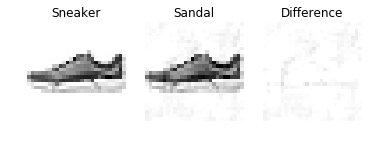

In [13]:
plt.figure()

plt.subplot(1, 3, 1)
title = y_name
plt.title(title)
plt.imshow(x, cmap=plt.cm.binary)
plt.axis('off')

plt.subplot(1, 3, 2)
title = class_names[np.argmax(model.predict(np.array([x_adv]))[0])]
plt.title(title)
plt.imshow(x_adv, cmap=plt.cm.binary)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Difference')
difference = x_adv - x
plt.imshow(difference, vmin=0, vmax=1, cmap=plt.cm.binary)
plt.axis('off')

plt.show()


In [73]:
num_iterations = 12
perturbed_images = np.empty((num_iterations,28,28))

                         
for iterations in range (num_iterations):
    print(iterations)
    x_adv = attack(input_or_adv = x, 
                   label = y,
                   iterations = iterations*100,
                   starting_point = starting_point_image,
                   log_every_n_steps = 100)
    perturbed_images[iterations] = x_adv

0
run with verbose=True to see details
Step 0: 5.60511e-02, stepsizes = 1.0e-02/1.0e-02: 
1
run with verbose=True to see details
Step 0: 5.60511e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 100: 3.22209e-02, stepsizes = 1.0e-02/4.4e-03: d. reduced by 0.89% (2.8833e-04) (took 0.02194 seconds)
2
run with verbose=True to see details
Step 0: 5.60511e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 100: 3.50681e-02, stepsizes = 1.0e-02/4.4e-03:  (took 0.02094 seconds)
Step 200: 2.89856e-02, stepsizes = 6.7e-03/2.0e-03:  (took 0.01097 seconds)
3
run with verbose=True to see details
Step 0: 5.60511e-02, stepsizes = 1.0e-02/1.0e-02: 
Step 100: 3.46031e-02, stepsizes = 1.0e-02/4.4e-03:  (took 0.02493 seconds)
Step 200: 2.81953e-02, stepsizes = 1.0e-02/2.0e-03: d. reduced by 0.39% (1.1172e-04) (took 0.01296 seconds)
Step 300: 2.03063e-02, stepsizes = 1.5e-02/4.4e-03: d. reduced by 0.39% (8.0461e-05) (took 0.01496 seconds)
4
run with verbose=True to see details
Step 0: 5.60511e-02, stepsizes = 1.0e-02/1.0e-02:

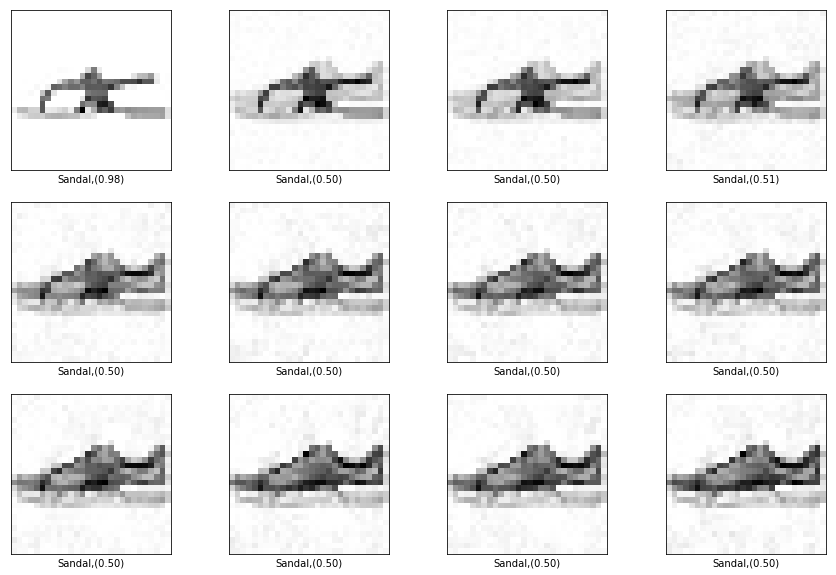

In [84]:
plt.figure(figsize=(15, 10))

perturbed_predictions = model.predict(perturbed_images)

for i in range(num_iterations):
    plt.subplot(3,4,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(perturbed_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(perturbed_predictions[i]) # the label should always be the target
    plt.xlabel("{},({:.2f})".format(class_names[predicted_label],
                                    perturbed_predictions[i][predicted_label]))  

